In [171]:
#!unzip "/content/drive/MyDrive/train_dataset_Самолет2.zip" -d "/content/"

In [172]:
#!pip install catboost

In [173]:
#!pip install shap

In [174]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.model_selection import KFold, TimeSeriesSplit
from catboost import CatBoostRegressor
from tqdm import tqdm
from sklearn.metrics import log_loss, roc_auc_score, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error

import shap

In [175]:
#os.chdir(r'D:\!!ufa\cp_s2')

In [176]:
pd.options.display.max_columns=None

In [177]:
test = pd.read_excel('test.xlsx')
train = pd.read_excel('train.xlsx')

In [178]:
material_prices = pd.read_excel('Цены на сырье.xlsx')
train=train.merge(material_prices, on='dt', how='left')
test=test.merge(material_prices, on='dt', how='left')

In [179]:
'''to_drop=['Лом_Б26 легированный (Ni 9,3%), РФ CPT, руб./т, без НДС',
       'Чугун_FOB Бразилия Юг, $/т',
       'Лом_3А, РФ FCA ж/д Кемеровская обл, руб./т, без НДС',
       'Чугун_CFR Западная Европа, $/т',
       'Лом_3А, РФ FCA ж/д Челябинская обл, руб./т, без НДС',
       'Лом_3А, РФ FCA ж/д ХМАО, руб./т, без НДС',
       'Лом_3А, РФ FCA ж/д Самарская обл, руб./т, без НДС',
       'Лом_3А, РФ FCA ж/д Нижегородская обл, руб./т, без НДС',
       'Лом_3А, РФ FCA ж/д Новосибирская обл, руб./т, без НДС',
       'Лом_3А, РФ FCA ж/д Свердловская обл, руб./т, без НДС',
        'Чугун_FOB Россия Дальневосточные порты, $/т',
        'Лом_3А, РФ CPT авто Центральный ФО, руб./т, без НДС',
        'Лом_3А, РФ CPT авто Уральский ФО, руб./т, без НДС',
        'Лом_3А, РФ CPT авто Южный ФО, руб./т, без НДС',
        'ГБЖ_Россия, FCA руб./т, без НДС']
inter=['Чугун_CFR Италия, $/т', 'ГБЖ_CFR Италия, $/т',
       'Чугун_CFR NOLA США, $/т', 'Чугун_CFR Турция, $/т',
       'ЖРС_Средневзвешенная цена окатыши Fe 62-65,5%, Россия FCA руб./т, без НДС',
       'ЖРС_Средневзвешенная цена концентрат Fe 64-68%, Россия FCA руб./т, без НДС',
       'ЖРС_Средневзвешенная цена аглоруда Fe 52-60%, Россия FCA руб./т, без НДС',
       'ЖРС_Средневзвешенная цена за 1 % Fe в аглоруде, Россия FCA руб./т, без НДС',
       'ЖРС_Средневзвешенная цена за 1 % Fe в концентрате, Россия FCA руб./т, без НДС',
       'ЖРС_Средневзвешенная цена за 1 % Fe в окатыши, Россия FCA руб./т, без НДС',
       'ЖРС_Украинский концентрат Fe 65-68%,  DAP граница Украины с Европой,  $/т',
       'ЖРС_Украинские окатыши Fe 65-66%, DAP граница Украины с Европой,  $/т']'''

"to_drop=['Лом_Б26 легированный (Ni 9,3%), РФ CPT, руб./т, без НДС',\n       'Чугун_FOB Бразилия Юг, $/т',\n       'Лом_3А, РФ FCA ж/д Кемеровская обл, руб./т, без НДС',\n       'Чугун_CFR Западная Европа, $/т',\n       'Лом_3А, РФ FCA ж/д Челябинская обл, руб./т, без НДС',\n       'Лом_3А, РФ FCA ж/д ХМАО, руб./т, без НДС',\n       'Лом_3А, РФ FCA ж/д Самарская обл, руб./т, без НДС',\n       'Лом_3А, РФ FCA ж/д Нижегородская обл, руб./т, без НДС',\n       'Лом_3А, РФ FCA ж/д Новосибирская обл, руб./т, без НДС',\n       'Лом_3А, РФ FCA ж/д Свердловская обл, руб./т, без НДС',\n        'Чугун_FOB Россия Дальневосточные порты, $/т',\n        'Лом_3А, РФ CPT авто Центральный ФО, руб./т, без НДС',\n        'Лом_3А, РФ CPT авто Уральский ФО, руб./т, без НДС',\n        'Лом_3А, РФ CPT авто Южный ФО, руб./т, без НДС',\n        'ГБЖ_Россия, FCA руб./т, без НДС']\ninter=['Чугун_CFR Италия, $/т', 'ГБЖ_CFR Италия, $/т',\n       'Чугун_CFR NOLA США, $/т', 'Чугун_CFR Турция, $/т',\n       'ЖРС_Средн

In [180]:
'''material_prices = material_prices.drop(to_drop, axis=1)
#material_prices['ГБЖ_Россия, FCA руб./т, без НДС']=material_prices['ГБЖ_Россия, FCA руб./т, без НДС'].ffill().bfill()
for i in inter:
    material_prices[i]=material_prices[i].interpolate()
isna_cols=material_prices.isna().sum()[material_prices.isna().sum()>0].keys()
for i in isna_cols:
    material_prices[i]=material_prices[i].fillna(material_prices[i].mean())'''

"material_prices = material_prices.drop(to_drop, axis=1)\n#material_prices['ГБЖ_Россия, FCA руб./т, без НДС']=material_prices['ГБЖ_Россия, FCA руб./т, без НДС'].ffill().bfill()\nfor i in inter:\n    material_prices[i]=material_prices[i].interpolate()\nisna_cols=material_prices.isna().sum()[material_prices.isna().sum()>0].keys()\nfor i in isna_cols:\n    material_prices[i]=material_prices[i].fillna(material_prices[i].mean())"

In [181]:
market_material = pd.read_excel('Данные рынка стройматериалов.xlsx')
train=train.merge(market_material, on='dt', how='left')
test=test.merge(market_material, on='dt', how='left')

In [182]:
train.head(3)

,dt,Цена на арматуру,"Концентрат коксующегося угля_Россия марка ОС FCA руб./т, без НДС","Лом_HMS 1/2 80:20, FOB EC Роттердам, $/т","Лом_3А, РФ CPT ж/д Южный ФО, руб./т, без НДС","Лом_3А, РФ CPT ж/д Сибирский ФО, руб./т, без НДС","Лом_3А, РФ CPT ж/д Центральный ФО, руб./т, без НДС","ЖРС_Китай Iron ore fines Fe 62%, CFR","Чугун_CFR Италия, $/т","Концентрат коксующегося угля_Россия марка КО FCA руб./т, без НДС","ЖРС_Российские окатыши Fe 62-65,5%, SiO2 5,8-8,65, DAP Забайкальск-Манжули, $/т","Лом_3А, РФ CPT авто Центральный ФО, руб./т, без НДС","Лом_3А, РФ CPT авто Уральский ФО, руб./т, без НДС","Лом_HMS 1/2 80:20, FOB США Восток, $/т","Лом_3А, FOB РФ Черное море, $/т","Чугун_FOB Бразилия Север, $/т","Лом_3А, РФ CPT авто Южный ФО, руб./т, без НДС","Лом_HMS 1/2 80:20, CFR ЮВА, $/т","Концентрат коксующегося угля_Россия марка КС FCA руб./т, без НДС","Лом_Б26 легированный (Ni 9,3%), РФ CPT, руб./т, без НДС","ГБЖ_Россия, FCA руб./т, без НДС","Лом_3А, РФ FCA ж/д респ. Татарстан, руб./т, без НДС","Чугун_FOB Бразилия Юг, $/т","ЖРС_Российский концентрат Fe 62,5-67,5%, SiO2 0,78-8,51, сухой вес, DAP Забайкальск-Манжули, $/т","Концентрат коксующегося угля_Россия марка К и смеси марок К, КО FCA руб./т, без НДС","Чугун_FOB Россия Дальневосточные порты, $/т","Кокс_Россия Урал Сибирь +25, FCA руб./т., без НДС","Лом_3А, РФ FCA ж/д Московский регион, руб./т, без НДС","Концентрат коксующегося угля_Россия марка Ж+ГЖ FCA руб./т, без НДС","Чугун_FOB Россия Черное море, $/т","Лом_3А, РФ FCA ж/д Кемеровская обл, руб./т, без НДС","ЖРС_Россия аглоруда Fe 52-60%, FCA руб./т, без НДС","ЖРС_Россия концентрат Fe 64-68%, FCA руб./т, без НДС","Чугун_Россия, FCA руб./т, без НДС","Концентрат коксующегося угля_HCC Австралия, $/t FOB","ЖРС_Россия окатыши Fe 62-65,5% FCA руб./т, без НДС","ГБЖ_CFR Италия, $/т","Лом_3А, РФ CPT ж/д Уральский ФО, руб./т, без НДС","Концентрат коксующегося угля_Россия марка Ж FCA руб./т, без НДС","Чугун_CFR Западная Европа, $/т","Лом_3А, РФ FCA ж/д Челябинская обл, руб./т, без НДС","Лом_3А, РФ FCA ж/д ХМАО, руб./т, без НДС","Лом_HMS 1/2 80:20, CFR Турция, $/т","Чугун_CFR Китай, $/т","Лом_3А, РФ FCA ж/д Самарская обл, руб./т, без НДС","Концентрат коксующегося угля_Средняя шихта Россия FCA руб./т, без НДС","Концентрат коксующегося угля_Россия марка ГЖ FCA руб./т, без НДС","Лом_3А, РФ FCA ж/д Нижегородская обл, руб./т, без НДС","Чугун_CFR NOLA США, $/т","Лом_3А, РФ FCA ж/д Новосибирская обл, руб./т, без НДС","Лом_3А, РФ FCA ж/д Свердловская обл, руб./т, без НДС","Чугун_CFR Турция, $/т","ЖРС_Средневзвешенная цена окатыши Fe 62-65,5%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена концентрат Fe 64-68%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена аглоруда Fe 52-60%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена за 1 % Fe в аглоруде, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена за 1 % Fe в концентрате, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена за 1 % Fe в окатыши, Россия FCA руб./т, без НДС","ЖРС_Украинский концентрат Fe 65-68%, DAP граница Украины с Европой, $/т","ЖРС_Украинские окатыши Fe 65-66%, DAP граница Украины с Европой, $/т",Импорт цемента ЖД,Экспорт цемента ЖД,Отгрузка цемента хоппер ЖД,Отгрузка цемента остальные ЖД,Производство цемента,Импорт цемента,Экспорт цемента,Потребление цемента,Отгрузка цемента,Цена цемента с НДС,Цена цемента без НДС,Производство бетона РФ,Производство бетона МО,Производство бетона СПБ
0,2015-01-05,32900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-12,32500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [183]:
metal_market = pd.read_excel('Показатели рынка металла.xlsx')
train=train.merge(metal_market, on='dt', how='left')
test=test.merge(metal_market, on='dt', how='left')

In [184]:
fuel = pd.read_excel('Топливо.xlsx')
train=train.merge(fuel, on='dt', how='left')
test=test.merge(fuel, on='dt', how='left')

In [185]:
Cargo = pd.read_excel('Грузоперевозки.xlsx')
train=train.merge(Cargo, on='dt', how='left')
test=test.merge(Cargo, on='dt', how='left')

In [186]:
index_LME = pd.read_excel('Индекс LME.xlsx', nrows=516).rename(columns={'дата': 'dt'})
train=train.merge(index_LME, on='dt', how='left')
test=test.merge(index_LME, on='dt', how='left')

In [187]:
macro_indicators = pd.read_excel('Макропоказатели.xlsx')
train=train.merge(macro_indicators, on='dt', how='left')
test=test.merge(macro_indicators, on='dt', how='left')

In [188]:
train['Концентрат коксующегося угля_Россия марка ОС FCA руб./т, без НДС'].isna().sum()/len(train)

0.0125

In [189]:
use_col = list(train.isna().sum()[(train.isna().sum()/len(train))<0.2].keys())
#use_col = set(use_col+list(test.isna().sum()[(test.isna().sum()/len(test))<0.2].keys()))

train = train[use_col].fillna(method='ffill').fillna(method='bfill')
test = test[use_col].fillna(method='ffill').fillna(method='bfill')

In [190]:
pref_days = [0]
for year in range(2015 ,2023):
    pref_days.append(pd.Timestamp(f'{year}-12-31').dayofyear)
print(pref_days)
for i in range(1, len(pref_days)):
    pref_days[i] += pref_days[i-1]
print(pref_days)


def prepare(x):
    #if x=='nan':
    #    return -1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
    x = x.split(' ')
    #print(x)
    date = x[0].split('-')
    #time = x[1].split(':')
    year,month,day = map(int, date)
    timestamp = pd.Timestamp(f'{year}-{month}-{day}')
    #hour = 0 #int(time[0])
    dayofyear = timestamp.dayofyear
    dayofweek = timestamp.dayofweek
    ind_date = dayofyear + pref_days[year - 2015] - 1
    #ind_hour = ind_date * 24 + hour
    if dayofweek >= 5:
        days_to_weekend = 0
    else:
        days_to_weekend = min(dayofweek + 1, abs(5 - dayofweek))
    return year, month, ind_date
print(test.columns)


add_columns = list(map(lambda x: 'dt'+'_'+x, ['year', 'month', 'ind_date']))

train[add_columns] = list(train['dt'].astype(str).apply(prepare))
test[add_columns] = list(test['dt'].astype(str).apply(prepare))

for col in add_columns:

    train[col] = train[col].astype(np.int32)
    test[col] = test[col].astype(np.int32)

del train['dt'],test['dt']

[0, 365, 366, 365, 365, 365, 366, 365, 365]
[0, 365, 731, 1096, 1461, 1826, 2192, 2557, 2922]
Index(['dt', 'Цена на арматуру',
       'Концентрат коксующегося угля_Россия марка ОС FCA руб./т, без НДС',
       'Лом_HMS 1/2 80:20, FOB EC Роттердам, $/т',
       'Лом_3А, РФ CPT ж/д Южный ФО, руб./т, без НДС',
       'Лом_3А, РФ CPT ж/д Сибирский ФО, руб./т, без НДС',
       'Лом_3А, РФ CPT ж/д Центральный ФО, руб./т, без НДС',
       'ЖРС_Китай Iron ore fines Fe 62%, CFR',
       'Концентрат коксующегося угля_Россия марка КО FCA руб./т, без НДС',
       'ЖРС_Российские окатыши Fe 62-65,5%, SiO2 5,8-8,65, DAP Забайкальск-Манжули, $/т',
       'Лом_HMS 1/2 80:20, FOB США Восток, $/т',
       'Лом_3А, FOB РФ Черное море, $/т', 'Чугун_FOB Бразилия Север, $/т',
       'Лом_HMS 1/2 80:20, CFR ЮВА, $/т',
       'Концентрат коксующегося угля_Россия марка КС FCA руб./т, без НДС',
       'Лом_3А, РФ FCA ж/д респ. Татарстан, руб./т, без НДС',
       'ЖРС_Российский концентрат Fe 62,5-67,5%, SiO2 0,7

In [191]:
len(train.columns)

38

In [192]:
list(train.columns)

['Цена на арматуру',
 'Концентрат коксующегося угля_Россия марка ОС FCA руб./т, без НДС',
 'Лом_HMS 1/2 80:20, FOB EC Роттердам, $/т',
 'Лом_3А, РФ CPT ж/д Южный ФО, руб./т, без НДС',
 'Лом_3А, РФ CPT ж/д Сибирский ФО, руб./т, без НДС',
 'Лом_3А, РФ CPT ж/д Центральный ФО, руб./т, без НДС',
 'ЖРС_Китай Iron ore fines Fe 62%, CFR',
 'Концентрат коксующегося угля_Россия марка КО FCA руб./т, без НДС',
 'ЖРС_Российские окатыши Fe 62-65,5%, SiO2 5,8-8,65, DAP Забайкальск-Манжули, $/т',
 'Лом_HMS 1/2 80:20, FOB США Восток, $/т',
 'Лом_3А, FOB РФ Черное море, $/т',
 'Чугун_FOB Бразилия Север, $/т',
 'Лом_HMS 1/2 80:20, CFR ЮВА, $/т',
 'Концентрат коксующегося угля_Россия марка КС FCA руб./т, без НДС',
 'Лом_3А, РФ FCA ж/д респ. Татарстан, руб./т, без НДС',
 'ЖРС_Российский концентрат Fe 62,5-67,5%, SiO2 0,78-8,51, сухой вес, DAP Забайкальск-Манжули, $/т',
 'Концентрат коксующегося угля_Россия марка К и смеси марок К, КО FCA руб./т, без НДС',
 'Кокс_Россия Урал Сибирь +25, FCA руб./т., без НДС

In [193]:
#train['Концентрат коксующегося угля_Россия марка ОС FCA руб./т, без НДС'].hist(column='count')

In [194]:
to_drop=['Лом_HMS 1/2 80:20, FOB EC Роттердам, $/т', 'Лом_HMS 1/2 80:20, CFR Турция, $/т',
         'Концентрат коксующегося угля_Россия марка ОС FCA руб./т, без НДС',
         'Лом_3А, РФ FCA ж/д респ. Татарстан, руб./т, без НДС',
         'Чугун_Россия, FCA руб./т, без НДС',
         #'ЖРС_Российские окатыши Fe 62-65,5%, SiO2 5,8-8,65, DAP Забайкальск-Манжули, $/т',
         'dt_ind_date',
         'Чугун_FOB Бразилия Север, $/т',
         'Кокс_Россия Урал Сибирь +25, FCA руб./т., без НДС',
         'ЖРС_Средневзвешенная цена окатыши Fe 62-65,5%, Россия FCA руб./т, без НДС',
         'dt_month',
         'Чугун_FOB Россия Черное море, $/т'
         #'Концентрат коксующегося угля_Россия марка ГЖ FCA руб./т, без НДС'
        ]
train=train.drop(to_drop, axis=1)
test=test.drop(to_drop, axis=1)

In [195]:
def advanced_reshape(x, portion_size: int):
    for i in range(x.shape[0] - portion_size + 1):
        yield x[i:i + portion_size, :].reshape(1, -1)

In [196]:
def form_portioned_array(x, portion_size: int):
    return np.concatenate(list(advanced_reshape(x, portion_size)),
                          axis=0)

In [197]:
from typing import Tuple


def form_lags(x: pd.Series, lags: Tuple[int]) -> pd.DataFrame:
    x_lags = tuple()
    for lag in lags:
        x_lags += (x.shift(lag), )
    return pd.concat(x_lags, axis=1).values


In [198]:
def generate_feats(data, test, gen_ft=None, max_ft=100, ratio=0.85):
    numerics = ['float64', 'int64', 'uint8']
    fts = data.copy()
    corrs = fts.corr()
    target='Цена на арматуру'
    if gen_ft is None:
        k = len(fts.columns) #длина колонок
        gen_ft = []
        for i in tqdm(range(k)):
            #for j in range(i+1, k):

            try:
                t1 = fts[fts.columns[i]].dtypes
                t2 = fts[target].dtypes
                if t1 not in numerics or t2 not in numerics:
                    continue
                if corrs[fts.columns[i]][target] != np.nan and ((corrs[fts.columns[i]][target] >= ratio) or (corrs[fts.columns[i]][target] <= -ratio)) and fts.columns[i]!=target:
                    gen_ft.append([i, target])
            except:
                pass
    for q in tqdm(range(min(max_ft, len(gen_ft)))):
        i, target = gen_ft[q]
        #test[f"{test.columns[i]}*{target}"] = test[test.columns[i]] * test[target]
        #test[f"{test.columns[i]}/{target}"] = test[test.columns[i]] / (test[target]+1e-9)
        #test[f"{target}/{test.columns[i]}"] = test[target] / (test[test.columns[i]]+1e-9)
        #test[f"{test.columns[i]}_func1_{target}"] = test[test.columns[i]] * test[target] / (test[test.columns[i]] + test[target] + 1e-9) ** 2
        test[f"{test.columns[i]}_func2_{target}"] = abs(test[test.columns[i]] - test[target]) ** 0.5 * abs(test[test.columns[i]] + test[target]) ** 0.5

        #fts[f"{fts.columns[i]}*{target}"] = fts[fts.columns[i]] * fts[target]
        #fts[f"{fts.columns[i]}/{target}"] = fts[fts.columns[i]] / (fts[target]+1e-9)
        #fts[f"{target}/{fts.columns[i]}"] = fts[target] / (fts[fts.columns[i]]+1e-9)
        #fts[f"{fts.columns[i]}_func1_{target}"] = fts[fts.columns[i]] * fts[target] / (fts[fts.columns[i]] + fts[target] + 1e-9) ** 2
        fts[f"{fts.columns[i]}_func2_{target}"] = abs(fts[fts.columns[i]] - fts[target]) ** 0.5 * abs(fts[fts.columns[i]] + fts[target]) ** 0.5

    # fts = reduce_mem_usage(fts)
    return fts, test

In [199]:
#train.corr()

In [200]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cols=train.columns

tr_targ=train['Цена на арматуру']
te_targ=test['Цена на арматуру']

#train=train.drop('Цена на арматуру',axis=1)
#test=test.drop('Цена на арматуру',axis=1)

scaler=scaler.fit(pd.concat([train, test], axis=0))

train=pd.DataFrame(scaler.transform(train), columns=cols[0:])
test=pd.DataFrame(scaler.transform(test), columns=cols[0:])

#train['Цена на арматуру']=tr_targ#np.log(tr_targ)
#test['Цена на арматуру']=te_targ#np.log(te_targ)

#train['pr_change']=train['Цена на арматуру'].pct_change()
#test['pr_change']=test['Цена на арматуру'].pct_change()

In [201]:
#train=train.dropna()
#test=test.dropna()

In [202]:
#train.corr()['Цена на арматуру']['pr_change']

In [203]:
train, test=generate_feats(train, test)

100%|██████████| 10/10 [00:00<00:00, 230.61it/s]


<Axes: >

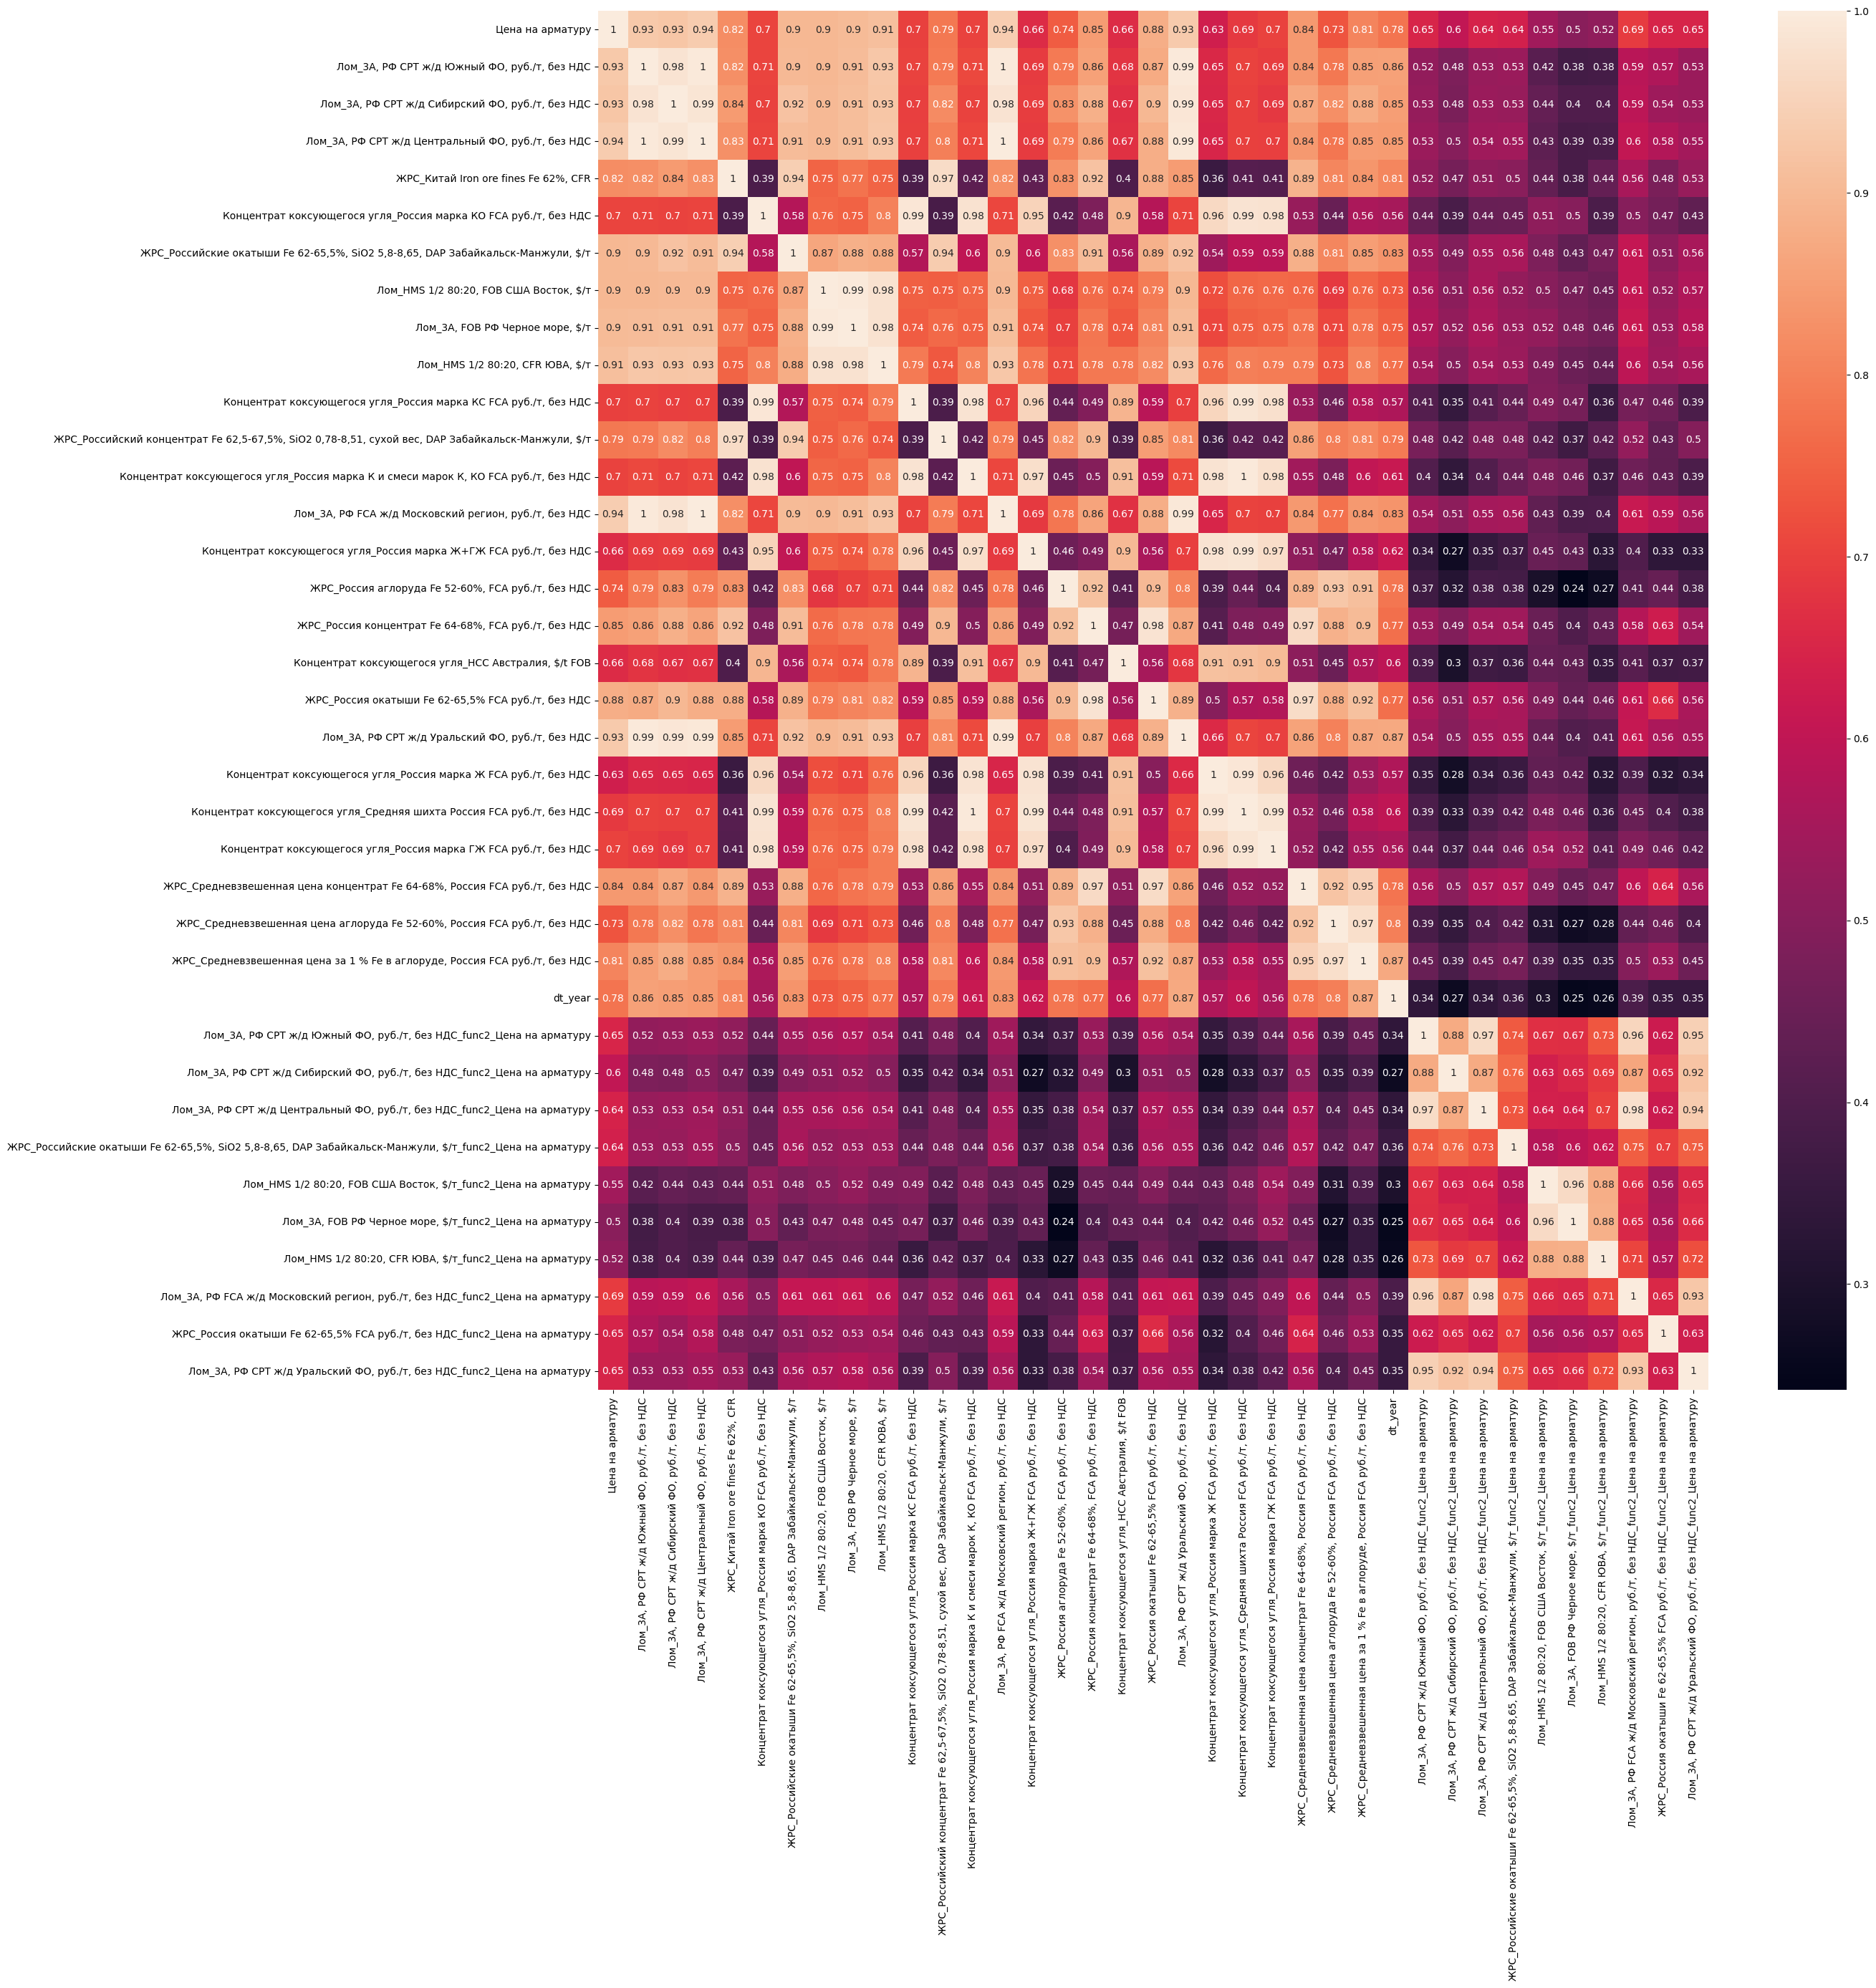

In [204]:
plt.figure(figsize=(25, 25))
sns.heatmap(train.corr(), annot=True)

In [205]:
'''train['rise/down']=False
for i in range(len(train)-1):
    train['rise/down'][i]=(train['Цена на арматуру'][i]-train['Цена на арматуру'][i+1])<0
train['rise/down']=train['rise/down'].astype('int8')
test['rise/down']=False
for i in range(len(test)-1):
    test['rise/down'][i]=(test['Цена на арматуру'][i]-test['Цена на арматуру'][i+1])<0
test['rise/down']=test['rise/down'].astype('int8')'''


"train['rise/down']=False\nfor i in range(len(train)-1):\n    train['rise/down'][i]=(train['Цена на арматуру'][i]-train['Цена на арматуру'][i+1])<0\ntrain['rise/down']=train['rise/down'].astype('int8')\ntest['rise/down']=False\nfor i in range(len(test)-1):\n    test['rise/down'][i]=(test['Цена на арматуру'][i]-test['Цена на арматуру'][i+1])<0\ntest['rise/down']=test['rise/down'].astype('int8')"

In [206]:
train

,Цена на арматуру,"Лом_3А, РФ CPT ж/д Южный ФО, руб./т, без НДС","Лом_3А, РФ CPT ж/д Сибирский ФО, руб./т, без НДС","Лом_3А, РФ CPT ж/д Центральный ФО, руб./т, без НДС","ЖРС_Китай Iron ore fines Fe 62%, CFR","Концентрат коксующегося угля_Россия марка КО FCA руб./т, без НДС","ЖРС_Российские окатыши Fe 62-65,5%, SiO2 5,8-8,65, DAP Забайкальск-Манжули, $/т","Лом_HMS 1/2 80:20, FOB США Восток, $/т","Лом_3А, FOB РФ Черное море, $/т","Лом_HMS 1/2 80:20, CFR ЮВА, $/т","Концентрат коксующегося угля_Россия марка КС FCA руб./т, без НДС","ЖРС_Российский концентрат Fe 62,5-67,5%, SiO2 0,78-8,51, сухой вес, DAP Забайкальск-Манжули, $/т","Концентрат коксующегося угля_Россия марка К и смеси марок К, КО FCA руб./т, без НДС","Лом_3А, РФ FCA ж/д Московский регион, руб./т, без НДС","Концентрат коксующегося угля_Россия марка Ж+ГЖ FCA руб./т, без НДС","ЖРС_Россия аглоруда Fe 52-60%, FCA руб./т, без НДС","ЖРС_Россия концентрат Fe 64-68%, FCA руб./т, без НДС","Концентрат коксующегося угля_HCC Австралия, $/t FOB","ЖРС_Россия окатыши Fe 62-65,5% FCA руб./т, без НДС","Лом_3А, РФ CPT ж/д Уральский ФО, руб./т, без НДС","Концентрат коксующегося угля_Россия марка Ж FCA руб./т, без НДС","Концентрат коксующегося угля_Средняя шихта Россия FCA руб./т, без НДС","Концентрат коксующегося угля_Россия марка ГЖ FCA руб./т, без НДС","ЖРС_Средневзвешенная цена концентрат Fe 64-68%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена аглоруда Fe 52-60%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена за 1 % Fe в аглоруде, Россия FCA руб./т, без НДС",dt_year,"Лом_3А, РФ CPT ж/д Южный ФО, руб./т, без НДС_func2_Цена на арматуру","Лом_3А, РФ CPT ж/д Сибирский ФО, руб./т, без НДС_func2_Цена на арматуру","Лом_3А, РФ CPT ж/д Центральный ФО, руб./т, без НДС_func2_Цена на арматуру","ЖРС_Российские окатыши Fe 62-65,5%, SiO2 5,8-8,65, DAP Забайкальск-Манжули, $/т_func2_Цена на арматуру","Лом_HMS 1/2 80:20, FOB США Восток, $/т_func2_Цена на арматуру","Лом_3А, FOB РФ Черное море, $/т_func2_Цена на арматуру","Лом_HMS 1/2 80:20, CFR ЮВА, $/т_func2_Цена на арматуру","Лом_3А, РФ FCA ж/д Московский регион, руб./т, без НДС_func2_Цена на арматуру","ЖРС_Россия окатыши Fe 62-65,5% FCA руб./т, без НДС_func2_Цена на арматуру","Лом_3А, РФ CPT ж/д Уральский ФО, руб./т, без НДС_func2_Цена на арматуру"
0,-0.510680,-0.934670,-1.102839,-0.846569,-0.793790,-0.928526,-0.965985,-0.945523,-0.790943,-0.852364,-0.941317,-0.910781,-0.990894,-0.808816,-1.113997,-1.101661,-0.892344,-0.868042,-0.824782,-1.004584,-0.962404,-1.044142,-0.902609,-0.950961,-1.090100,-1.154122,-1.525939,0.782824,0.977476,0.675193,0.819959,0.795751,0.603984,0.682444,0.627208,0.647665,0.865098
1,-0.541361,-0.934670,-1.102839,-0.846569,-0.793790,-0.928526,-0.965985,-0.945523,-0.790943,-0.852364,-0.941317,-0.910781,-0.990894,-0.808816,-1.113997,-1.101661,-0.892344,-0.868042,-0.824782,-1.004584,-0.962404,-1.044142,-0.902609,-0.950961,-1.090100,-1.154122,-1.525939,0.761929,0.960824,0.650851,0.800034,0.775204,0.576645,0.658371,0.600926,0.622248,0.846237
2,-0.579713,-0.934670,-1.102839,-0.846569,-0.793790,-0.928526,-0.965985,-0.945523,-0.790943,-0.852364,-0.941317,-0.910781,-0.990894,-0.808816,-1.113997,-1.101661,-0.892344,-0.868042,-0.824782,-1.004584,-0.962404,-1.044142,-0.902609,-0.950961,-1.090100,-1.154122,-1.525939,0.733172,0.938183,0.616938,0.772697,0.746958,0.538075,0.624866,0.564019,0.586684,0.820440
3,-0.679426,-0.934670,-1.102839,-0.846569,-0.793790,-0.928526,-0.965985,-0.945523,-0.790943,-0.852364,-0.941317,-0.910781,-0.990894,-0.808816,-1.113997,-1.101661,-0.892344,-0.868042,-0.824782,-1.004584,-0.962404,-1.044142,-0.902609,-0.950961,-1.090100,-1.154122,-1.525939,0.641863,0.868697,0.505034,0.686664,0.657566,0.404934,0.514688,0.438821,0.467595,0.739979
4,-0.710107,-0.934670,-1.102839,-0.846569,-0.793790,-0.928526,-0.965985,-0.945523,-0.790943,-0.852364,-0.941317,-0.910781,-0.990894,-0.808816,-1.113997,-1.101661,-0.892344,-0.868042,-0.824782,-1.004584,-0.962404,-1.044142,-0.902609,-0.950961,-1.090100,-1.154122,-1.5259

In [207]:
portion_size = 1

train_data = form_portioned_array(train.values, portion_size)[:-3]
test_data = form_portioned_array(test.values, portion_size)[:-3]

In [208]:
train_targets = form_lags(train['Цена на арматуру'], lags=(-portion_size,-portion_size-1,-portion_size-2))[:-3]
test_targets = form_lags(test['Цена на арматуру'], lags=(-portion_size,-portion_size-1,-portion_size-2))[:-3]

In [209]:
test_data

array([[ 0.4941247 ,  1.07612617,  0.8115518 ,  0.95656188,  0.1366562 ,
        -0.23680182, -0.10713477,  0.72170951,  0.71355534,  0.99634404,
        -0.18190481, -0.49907557,  0.13510442,  0.83425917, -0.15620393,
        -0.49505448, -0.27864787,  0.73242042, -0.36201474,  1.077928  ,
         0.27723144, -0.06304366, -0.32297311, -0.40656112, -0.49178326,
        -0.2722398 ,  1.42927282,  0.95597506,  0.64378343,  0.8190552 ,
         0.48237056,  0.52602794,  0.51478346,  0.86518335,  0.67218238,
         0.3363102 ,  0.9580029 ],
       [ 0.4941247 ,  1.06161544,  0.95524956,  0.83611564,  0.16250191,
        -0.23680182, -0.10713477,  0.42682486,  0.44737478,  0.75562689,
        -0.18190481, -0.47068206,  0.13510442,  0.74995513, -0.15620393,
        -0.49505448, -0.27864787,  0.75193826, -0.36201474,  1.01975727,
         0.27723144, -0.06304366, -0.32297311, -0.40656112, -0.49178326,
        -0.2722398 ,  1.42927282,  0.93961063,  0.81752218,  0.6744851 ,
         0.48237

In [210]:
test_targets

array([[0.4941247 , 0.4941247 , 0.45577336],
       [0.4941247 , 0.45577336, 0.45577336],
       [0.45577336, 0.45577336, 0.41742203],
       [0.45577336, 0.41742203, 0.34071936],
       [0.41742203, 0.34071936, 0.26401669],
       [0.34071936, 0.26401669, 0.18731402],
       [0.26401669, 0.18731402, 0.14896268],
       [0.18731402, 0.14896268, 0.11061134],
       [0.14896268, 0.11061134, 0.03390867],
       [0.11061134, 0.03390867, 0.03390867],
       [0.03390867, 0.03390867, 0.07226001],
       [0.03390867, 0.07226001, 0.16430321],
       [0.07226001, 0.16430321, 0.16430321],
       [0.16430321, 0.16430321, 0.22566535],
       [0.16430321, 0.22566535, 0.24100588],
       [0.22566535, 0.24100588, 0.24100588],
       [0.24100588, 0.24100588, 0.24100588],
       [0.24100588, 0.24100588, 0.24867615],
       [0.24100588, 0.24867615, 0.24867615],
       [0.24867615, 0.24867615, 0.37907069],
       [0.24867615, 0.37907069, 0.37907069],
       [0.37907069, 0.37907069, 0.4941247 ],
       [0.

In [211]:
len(test_data),len(test_targets)

(25, 25)

In [212]:
len(train_data),len(train_targets)

(397, 397)

In [213]:
print(train_data)

[[-0.51068029 -0.93466979 -1.10283932 ...  0.62720764  0.64766532
   0.86509826]
 [-0.54136136 -0.93466979 -1.10283932 ...  0.60092567  0.62224802
   0.84623711]
 [-0.57971269 -0.93466979 -1.10283932 ...  0.5640186   0.58668383
   0.82044047]
 ...
 [ 0.6091787   0.63346737  0.11710032 ...  0.57573149  0.43438657
   0.44836624]
 [ 0.6091787   0.92514936  0.21974158 ...  0.2958047   0.43438657
   0.2444348 ]
 [ 0.72423271  1.22139652  0.85980196 ...  0.46414339  0.52451311
   0.69116549]]


In [214]:
train_targets

array([[-0.54136136, -0.57971269, -0.67942616],
       [-0.57971269, -0.67942616, -0.71010723],
       [-0.67942616, -0.71010723, -0.71010723],
       ...,
       [ 0.6091787 ,  0.72423271,  0.6091787 ],
       [ 0.72423271,  0.6091787 ,  0.53247603],
       [ 0.6091787 ,  0.53247603,  0.4941247 ]])

In [215]:
train.head(10)

,Цена на арматуру,"Лом_3А, РФ CPT ж/д Южный ФО, руб./т, без НДС","Лом_3А, РФ CPT ж/д Сибирский ФО, руб./т, без НДС","Лом_3А, РФ CPT ж/д Центральный ФО, руб./т, без НДС","ЖРС_Китай Iron ore fines Fe 62%, CFR","Концентрат коксующегося угля_Россия марка КО FCA руб./т, без НДС","ЖРС_Российские окатыши Fe 62-65,5%, SiO2 5,8-8,65, DAP Забайкальск-Манжули, $/т","Лом_HMS 1/2 80:20, FOB США Восток, $/т","Лом_3А, FOB РФ Черное море, $/т","Лом_HMS 1/2 80:20, CFR ЮВА, $/т","Концентрат коксующегося угля_Россия марка КС FCA руб./т, без НДС","ЖРС_Российский концентрат Fe 62,5-67,5%, SiO2 0,78-8,51, сухой вес, DAP Забайкальск-Манжули, $/т","Концентрат коксующегося угля_Россия марка К и смеси марок К, КО FCA руб./т, без НДС","Лом_3А, РФ FCA ж/д Московский регион, руб./т, без НДС","Концентрат коксующегося угля_Россия марка Ж+ГЖ FCA руб./т, без НДС","ЖРС_Россия аглоруда Fe 52-60%, FCA руб./т, без НДС","ЖРС_Россия концентрат Fe 64-68%, FCA руб./т, без НДС","Концентрат коксующегося угля_HCC Австралия, $/t FOB","ЖРС_Россия окатыши Fe 62-65,5% FCA руб./т, без НДС","Лом_3А, РФ CPT ж/д Уральский ФО, руб./т, без НДС","Концентрат коксующегося угля_Россия марка Ж FCA руб./т, без НДС","Концентрат коксующегося угля_Средняя шихта Россия FCA руб./т, без НДС","Концентрат коксующегося угля_Россия марка ГЖ FCA руб./т, без НДС","ЖРС_Средневзвешенная цена концентрат Fe 64-68%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена аглоруда Fe 52-60%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена за 1 % Fe в аглоруде, Россия FCA руб./т, без НДС",dt_year,"Лом_3А, РФ CPT ж/д Южный ФО, руб./т, без НДС_func2_Цена на арматуру","Лом_3А, РФ CPT ж/д Сибирский ФО, руб./т, без НДС_func2_Цена на арматуру","Лом_3А, РФ CPT ж/д Центральный ФО, руб./т, без НДС_func2_Цена на арматуру","ЖРС_Российские окатыши Fe 62-65,5%, SiO2 5,8-8,65, DAP Забайкальск-Манжули, $/т_func2_Цена на арматуру","Лом_HMS 1/2 80:20, FOB США Восток, $/т_func2_Цена на арматуру","Лом_3А, FOB РФ Черное море, $/т_func2_Цена на арматуру","Лом_HMS 1/2 80:20, CFR ЮВА, $/т_func2_Цена на арматуру","Лом_3А, РФ FCA ж/д Московский регион, руб./т, без НДС_func2_Цена на арматуру","ЖРС_Россия окатыши Fe 62-65,5% FCA руб./т, без НДС_func2_Цена на арматуру","Лом_3А, РФ CPT ж/д Уральский ФО, руб./т, без НДС_func2_Цена на арматуру"
0,-0.510680,-0.934670,-1.102839,-0.846569,-0.793790,-0.928526,-0.965985,-0.945523,-0.790943,-0.852364,-0.941317,-0.910781,-0.990894,-0.808816,-1.113997,-1.101661,-0.892344,-0.868042,-0.824782,-1.004584,-0.962404,-1.044142,-0.902609,-0.950961,-1.0901,-1.154122,-1.525939,0.782824,0.977476,0.675193,0.819959,0.795751,0.603984,0.682444,0.627208,0.647665,0.865098
1,-0.541361,-0.934670,-1.102839,-0.846569,-0.793790,-0.928526,-0.965985,-0.945523,-0.790943,-0.852364,-0.941317,-0.910781,-0.990894,-0.808816,-1.113997,-1.101661,-0.892344,-0.868042,-0.824782,-1.004584,-0.962404,-1.044142,-0.902609,-0.950961,-1.0901,-1.154122,-1.525939,0.761929,0.960824,0.650851,0.800034,0.775204,0.576645,0.658371,0.600926,0.622248,0.846237
2,-0.579713,-0.934670,-1.102839,-0.846569,-0.793790,-0.928526,-0.965985,-0.945523,-0.790943,-0.852364,-0.941317,-0.910781,-0.990894,-0.808816,-1.113997,-1.101661,-0.892344,-0.868042,-0.824782,-1.004584,-0.962404,-1.044142,-0.902609,-0.950961,-1.0901,-1.154122,-1.525939,0.733172,0.938183,0.616938,0.772697,0.746958,0.538075,0.624866,0.564019,0.586684,0.820440
3,-0.679426,-0.934670,-1.102839,-0.846569,-0.793790,-0.928526,-0.965985,-0.945523,-0.790943,-0.852364,-0.941317,-0.910781,-0.990894,-0.808816,-1.113997,-1.101661,-0.892344,-0.868042,-0.824782,-1.004584,-0.962404,-1.044142,-0.902609,-0.950961,-1.0901,-1.154122,-1.525939,0.641863,0.868697,0.505034,0.686664,0.657566,0.404934,0.514688,0.438821,0.467595,0.739979
4,-0.710107,-0.934670,-1.102839,-0.846569,-0.793790,-0.928526,-0.965985,-0.945523,-0.790943,-0.852364,-0.941317,-0.910781,-0.990894,-0.808816,-1.113997,-1.101661,-0.892344,-0.868042,-0.824782,-1.004584,-0.962404,-1.044142,-0.902609,-0.950961,-1.0901,-1.154122,-1.525939,0.60774

In [216]:
from catboost import CatBoostRegressor

In [217]:
'''X_train[-1][0],X_train[-1][44],X_train[-1][88]'''

'X_train[-1][0],X_train[-1][44],X_train[-1][88]'

In [218]:
'''names=[]
for i in range(3):
  for col in train.columns:
    names.append(f'{i}'+col)
d={'names': names,
   'imp': shap_values[-1]}

df=pd.DataFrame(d)
df=df.sort_values(by='imp')
df'''

"names=[]\nfor i in range(3):\n  for col in train.columns:\n    names.append(f'{i}'+col)\nd={'names': names,\n   'imp': shap_values[-1]}\n\ndf=pd.DataFrame(d)\ndf=df.sort_values(by='imp')\ndf"

In [219]:
train_targets

array([[-0.54136136, -0.57971269, -0.67942616],
       [-0.57971269, -0.67942616, -0.71010723],
       [-0.67942616, -0.71010723, -0.71010723],
       ...,
       [ 0.6091787 ,  0.72423271,  0.6091787 ],
       [ 0.72423271,  0.6091787 ,  0.53247603],
       [ 0.6091787 ,  0.53247603,  0.4941247 ]])

In [220]:
X=train_data
y=train_targets

splits=15
n_models=3

models=[]
best_scores=[1e9 for i in range(n_models)]
real_scores=[1e30 for i in range(n_models)]
for i in range(n_models):
    cb=CatBoostRegressor(iterations=2000,verbose=1000, random_state=42)
    models.append(cb)
best_models=models.copy()

kf = TimeSeriesSplit(n_splits=splits)

for i, (train_index, val_index) in enumerate(kf.split(X,y)):

    print('FOLD ',i)

    X_train, X_val = X[train_index], X[val_index]

    for j, model in enumerate(models):

        print('MODEL ', j)

        y_train, y_val = y[:,j][train_index], np.array(y[:,j][val_index])

        model.fit(X_train, y_train, eval_set=(X_val, y_val))

        pred = np.array(model.predict(X_val))

        score = mean_absolute_error(pred, y_val)

        pred = (pred*scaler.scale_[0]) + scaler.mean_[0]#2**pred
        y_val = (y_val*scaler.scale_[0]) + scaler.mean_[0]#2**y_valA

        real_score = mean_absolute_error(pred, y_val)

        print(score,real_score)

        if score<best_scores[j]:
            best_scores[j] = score
            real_scores[j] = real_score
            best_models[j] = model

        models[j]=best_models[j]

FOLD  0
MODEL  0
Learning rate set to 0.019883
0:	learn: 0.1983890	test: 0.2982682	best: 0.2982682 (0)	total: 5.04ms	remaining: 10.1s
1000:	learn: 0.0019192	test: 0.2136184	best: 0.2136183 (999)	total: 864ms	remaining: 863ms
1999:	learn: 0.0017833	test: 0.2133870	best: 0.2133862 (1935)	total: 1.59s	remaining: 0us

bestTest = 0.2133862192
bestIteration = 1935

Shrink model to first 1936 iterations.
0.18510703876979165 2413.306303164318
MODEL  1
Learning rate set to 0.019883
0:	learn: 0.1841957	test: 0.2820839	best: 0.2820839 (0)	total: 1.55ms	remaining: 3.1s
1000:	learn: 0.0063178	test: 0.2075140	best: 0.2075140 (1000)	total: 711ms	remaining: 710ms
1999:	learn: 0.0062416	test: 0.2073335	best: 0.2072966 (1498)	total: 1.43s	remaining: 0us

bestTest = 0.207296553
bestIteration = 1498

Shrink model to first 1499 iterations.
0.17666886401447526 2303.294817596054
MODEL  2
Learning rate set to 0.019883
0:	learn: 0.1698825	test: 0.2650925	best: 0.2650925 (0)	total: 1.16ms	remaining: 2.33s
1000:

In [221]:
print(best_scores)#1324 1583 2001
print(real_scores)#1500 1700 2100

[0.0533082368442265, 0.06688107615906906, 0.07153431073374114]
[694.99844436895, 871.9523780931141, 932.6182523018427]


In [222]:
test_data

array([[ 0.4941247 ,  1.07612617,  0.8115518 ,  0.95656188,  0.1366562 ,
        -0.23680182, -0.10713477,  0.72170951,  0.71355534,  0.99634404,
        -0.18190481, -0.49907557,  0.13510442,  0.83425917, -0.15620393,
        -0.49505448, -0.27864787,  0.73242042, -0.36201474,  1.077928  ,
         0.27723144, -0.06304366, -0.32297311, -0.40656112, -0.49178326,
        -0.2722398 ,  1.42927282,  0.95597506,  0.64378343,  0.8190552 ,
         0.48237056,  0.52602794,  0.51478346,  0.86518335,  0.67218238,
         0.3363102 ,  0.9580029 ],
       [ 0.4941247 ,  1.06161544,  0.95524956,  0.83611564,  0.16250191,
        -0.23680182, -0.10713477,  0.42682486,  0.44737478,  0.75562689,
        -0.18190481, -0.47068206,  0.13510442,  0.74995513, -0.15620393,
        -0.49505448, -0.27864787,  0.75193826, -0.36201474,  1.01975727,
         0.27723144, -0.06304366, -0.32297311, -0.40656112, -0.49178326,
        -0.2722398 ,  1.42927282,  0.93961063,  0.81752218,  0.6744851 ,
         0.48237

0.13537178733304908
1764.8901403893099
0.15796909469637943
2059.4992738771402
0.16911427214263358
2204.802916351699
5993.349226859325
[44500.20470162 42475.40577401 42451.35860045 42414.80674214
 42838.91951132 43450.93418838 43618.47259496 43642.44050649
 43638.28984519 42939.15393891 42286.18534077 41674.75085601
 41423.96542679 40528.54557217 39098.66927841 38819.74744276
 39396.32224346 39115.20552657 42539.68284531 44757.97094968
 46460.28919103 48839.92903099 49417.25068297 49746.60806642
 49506.65077314]
[45500. 45500. 45000. 44000. 43000. 42000. 41500. 41000. 40000. 40000.
 40500. 41700. 41700. 42500. 42700. 42700. 42700. 42800. 42800. 44500.
 44500. 46000. 49200. 53700. 55500.]


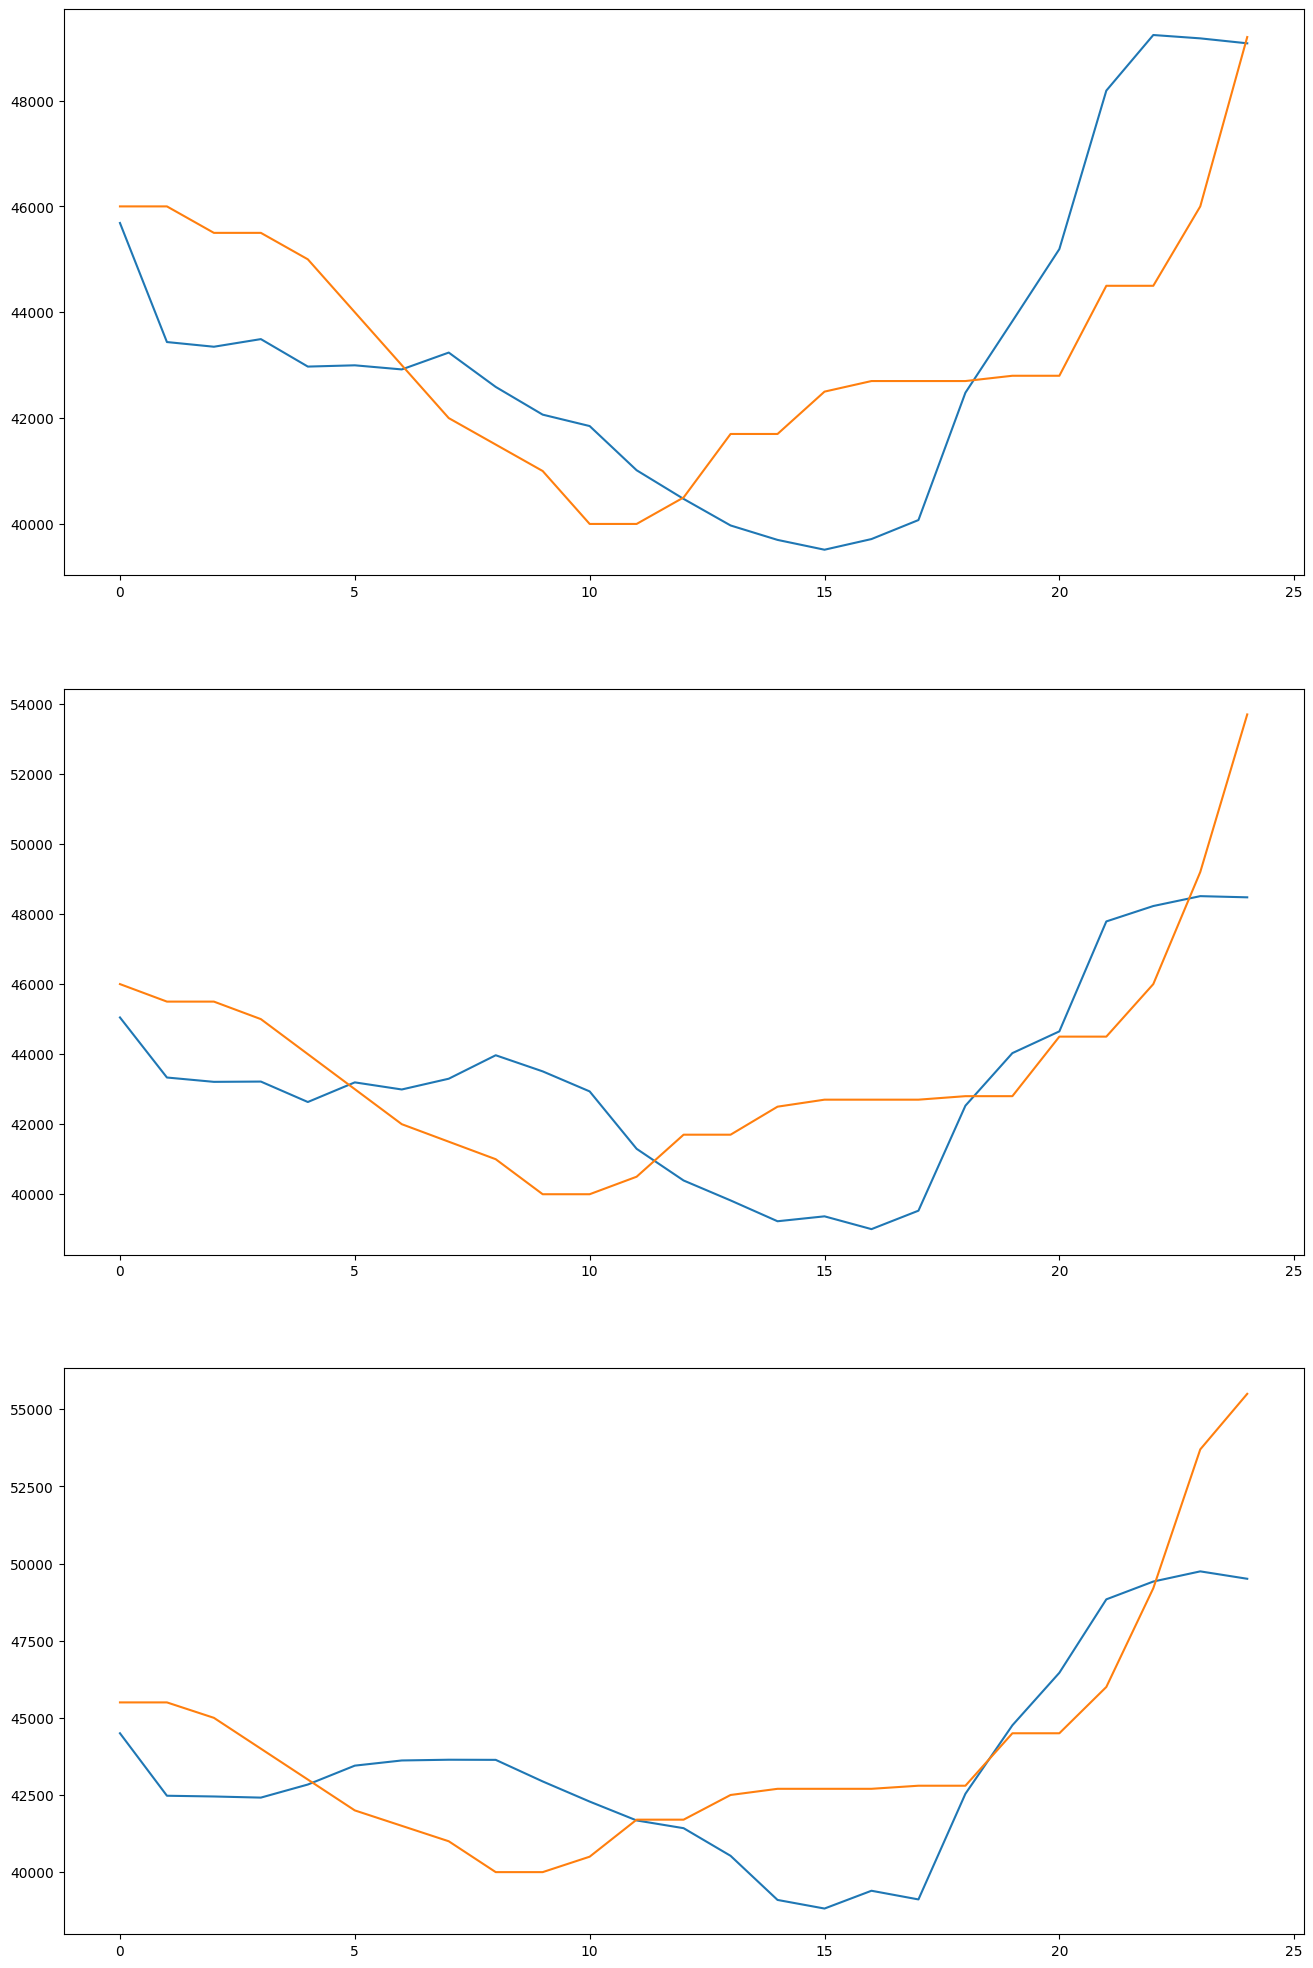

In [223]:
fig, axs = plt.subplots(3, 1, figsize=(16, 25))
#axs.flatten()
for i,model in enumerate(best_models):
    pred=model.predict(test_data)

    print(mean_absolute_error(test_targets[:,i],pred))

    pred = (pred*scaler.scale_[0]) + scaler.mean_[0]#2**pred
    test_targets_col = (test_targets[:,i]*scaler.scale_[0]) + scaler.mean_[0]#2**test_targets[:,i]
    pd.Series(pred).plot(ax=axs[i])
    pd.Series(test_targets_col).plot(ax=axs[i])
    print(mean_absolute_error(test_targets_col,pred))

print(max(abs(pred-test_targets_col)))
print(pred)
print(test_targets_col)

In [224]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test_data[10:20])

In [225]:
shap_values.shape

(10, 37)

In [226]:
names=[]
for col in train.columns:
    names.append(col)
for i in range(10, 20):

    d={'names': names,
       'imp': shap_values[i-10]}

    df=pd.DataFrame(d)
    df=df.sort_values(by='imp')
    print(i)
    print(df)
    print()

10
                                                names       imp
8                     Лом_3А, FOB РФ Черное море, $/т -0.049312
6   ЖРС_Российские окатыши Fe 62-65,5%, SiO2 5,8-8... -0.023164
9                     Лом_HMS 1/2 80:20, CFR ЮВА, $/т -0.020728
35  ЖРС_Россия окатыши Fe 62-65,5% FCA руб./т, без... -0.016251
18  ЖРС_Россия окатыши Fe 62-65,5% FCA руб./т, без... -0.015881
30  ЖРС_Российские окатыши Fe 62-65,5%, SiO2 5,8-8... -0.014864
22  Концентрат коксующегося угля_Россия марка ГЖ F... -0.010354
34  Лом_3А, РФ FCA ж/д Московский регион, руб./т, ... -0.008921
20  Концентрат коксующегося угля_Россия марка Ж FC... -0.007518
16  ЖРС_Россия концентрат Fe 64-68%, FCA руб./т, б... -0.007437
32  Лом_3А, FOB РФ Черное море, $/т_func2_Цена на ... -0.003739
33  Лом_HMS 1/2 80:20, CFR ЮВА, $/т_func2_Цена на ... -0.002076
23  ЖРС_Средневзвешенная цена концентрат Fe 64-68%... -0.001403
29  Лом_3А, РФ CPT ж/д Центральный ФО, руб./т, без...  0.000000
10  Концентрат коксующегося угля_Росс

<Axes: >

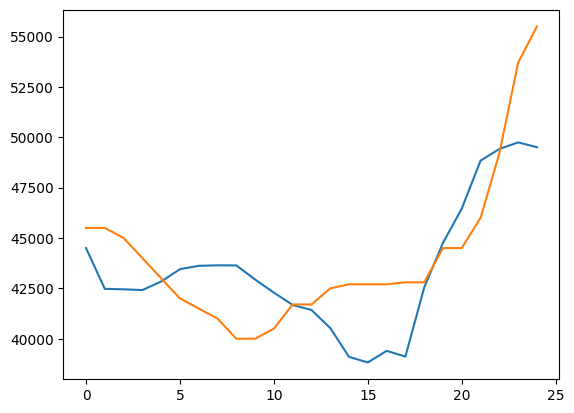

In [227]:
pd.Series(pred).plot()
pd.Series(test_targets_col).plot()

In [228]:
armatura=29
inventory=0
bal=0

In [229]:
test_prices=pd.read_excel('test.xlsx')[1:-1]
len(test_prices)

26

In [230]:
best_zakup=1165500

In [231]:
#test_data

In [232]:
signal_cnt=2
signal=False
for i,row in enumerate(test_data):
    zakup=1
    queue=[row[0]]
    for model in best_models:
        queue.append(model.predict(row))
    down_m=np.mean([queue[1],queue[0]])
    up_m=np.mean([queue[3],queue[2]])

    if up_m>down_m:
        signal=True
    if signal:
        signal_cnt-=1
    if signal_cnt==0:
        if np.mean([queue[1]-queue[0],queue[2]-queue[1],queue[3]-queue[2]])>0:
            zakup=10
            signal=False
            signal_cnt=2
            print('trend change')

    bal-=zakup*test_prices['Цена на арматуру'].values[i]
    inventory+=zakup
    while inventory>29:
        inventory-=1
        bal+=test_prices['Цена на арматуру'].values[i]
    zakup=1
    print(down_m,up_m,np.mean([queue[1]-queue[0],queue[2]-queue[1],queue[3]-queue[2]]),inventory)
print(bal,inventory)
print(bal/best_zakup)

0.48210685391393826 0.4000779614061215 -0.03834610165049233 1
0.3958294271022851 0.2566534504332496 -0.09011526347118672 2
0.39243067857200997 0.2509833777159843 -0.09073009094979724 3
0.37878095149446644 0.24988484558660048 -0.07888085421037212 4
0.35887092739315485 0.24377269544875182 -0.0680373268465327 5
0.3406154032776002 0.2887467688571981 -0.03960582830185947 6
0.2992890630079862 0.28739040925645454 -0.009754723642440418 7
0.27314428098948434 0.3000957281755665 0.016425634213438994 8
trend change
0.2099083260067307 0.32562917083510856 0.04188706885807831 18
0.17063765154751942 0.2811654062218475 0.036795650240714295 19
trend change
0.14319604558090243 0.234179928206739 0.03288461690177611 29
0.07281673802534254 0.14786605997533403 0.04281928782737835 29
trend change
0.05205756407041934 0.10356506938737076 0.03640731709276113 29
0.05198406813996911 0.047400535172939386 0.0007298405410343054 29
0.08753913584110348 -0.030246013771850804 -0.06650967127595513 29
0.0804259700340805 -0

In [233]:
import pickle

In [234]:
for i,model in enumerate(best_models):
  with open(f'model{i}.pkl','wb') as f:
    pickle.dump(model,f)

np.savetxt('test_data.txt',test_data)